In [1]:
import sys
sys.path.append("..")
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel
from galpy.actionAngle import UnboundError

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

import numpy as np
from scipy import stats
from IPython.display import Image, display

import corner

import datetime
import random

import copy

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from matplotlib import animation
from matplotlib.colors import LogNorm
from matplotlib import rcParams

import datetime

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'

cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))
%config InlineBackend.figure_format = 'retina'

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

  Referenced from: /Users/smilanov/anaconda3/lib/python3.6/site-packages/galpy_interppotential_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/smilanov/anaconda3/lib/python3.6/site-packages/galpy_actionAngle_c.cpython-36m-darwin.so
  Reason: image not found' 
  Referenced from: /Users/smilanov/anaconda3/lib/python3.6/site-packages/galpy_actionAngle_c.cpython-36m-darwin.so
  Reason: image not found' 


In [2]:
machine = 'mac'
#machine = 'magny'
#machine = 'virgo'

if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
   

In [5]:
a_MND_all, b_MND_all, a_HB_all, a_NFWH_all, v0_MND_all, v0_HB_all, v0_NFWH_all = np.loadtxt('../../files/potential/potfitvals_nov18.txt')

In [7]:
v0_all = np.sqrt(v0_MND_all**2 + v0_HB_all**2 + v0_NFWH_all**2)

In [8]:
ndim = 8
labels = ["v$_0$ [km s$^{-1}$]","a$_{\mathrm{MND}}$ [kpc]","b$_{\mathrm{MND}}$ [kpc]","a$_{\mathrm{NFWH}}$ [kpc]","a$_{\mathrm{HB}}$ [kpc]","v$_{0, \mathrm{MND}}$ [km s$^{-1}$]","v$_{0, \mathrm{NFWH}}$ [km s$^{-1}$]","v$_{0, \mathrm{HB}}$ [km s$^{-1}$]"]

params = np.vstack([v0_all,a_MND_all, b_MND_all, a_NFWH_all, a_HB_all, v0_MND_all, v0_NFWH_all, v0_HB_all])


NameError: name 'age' is not defined

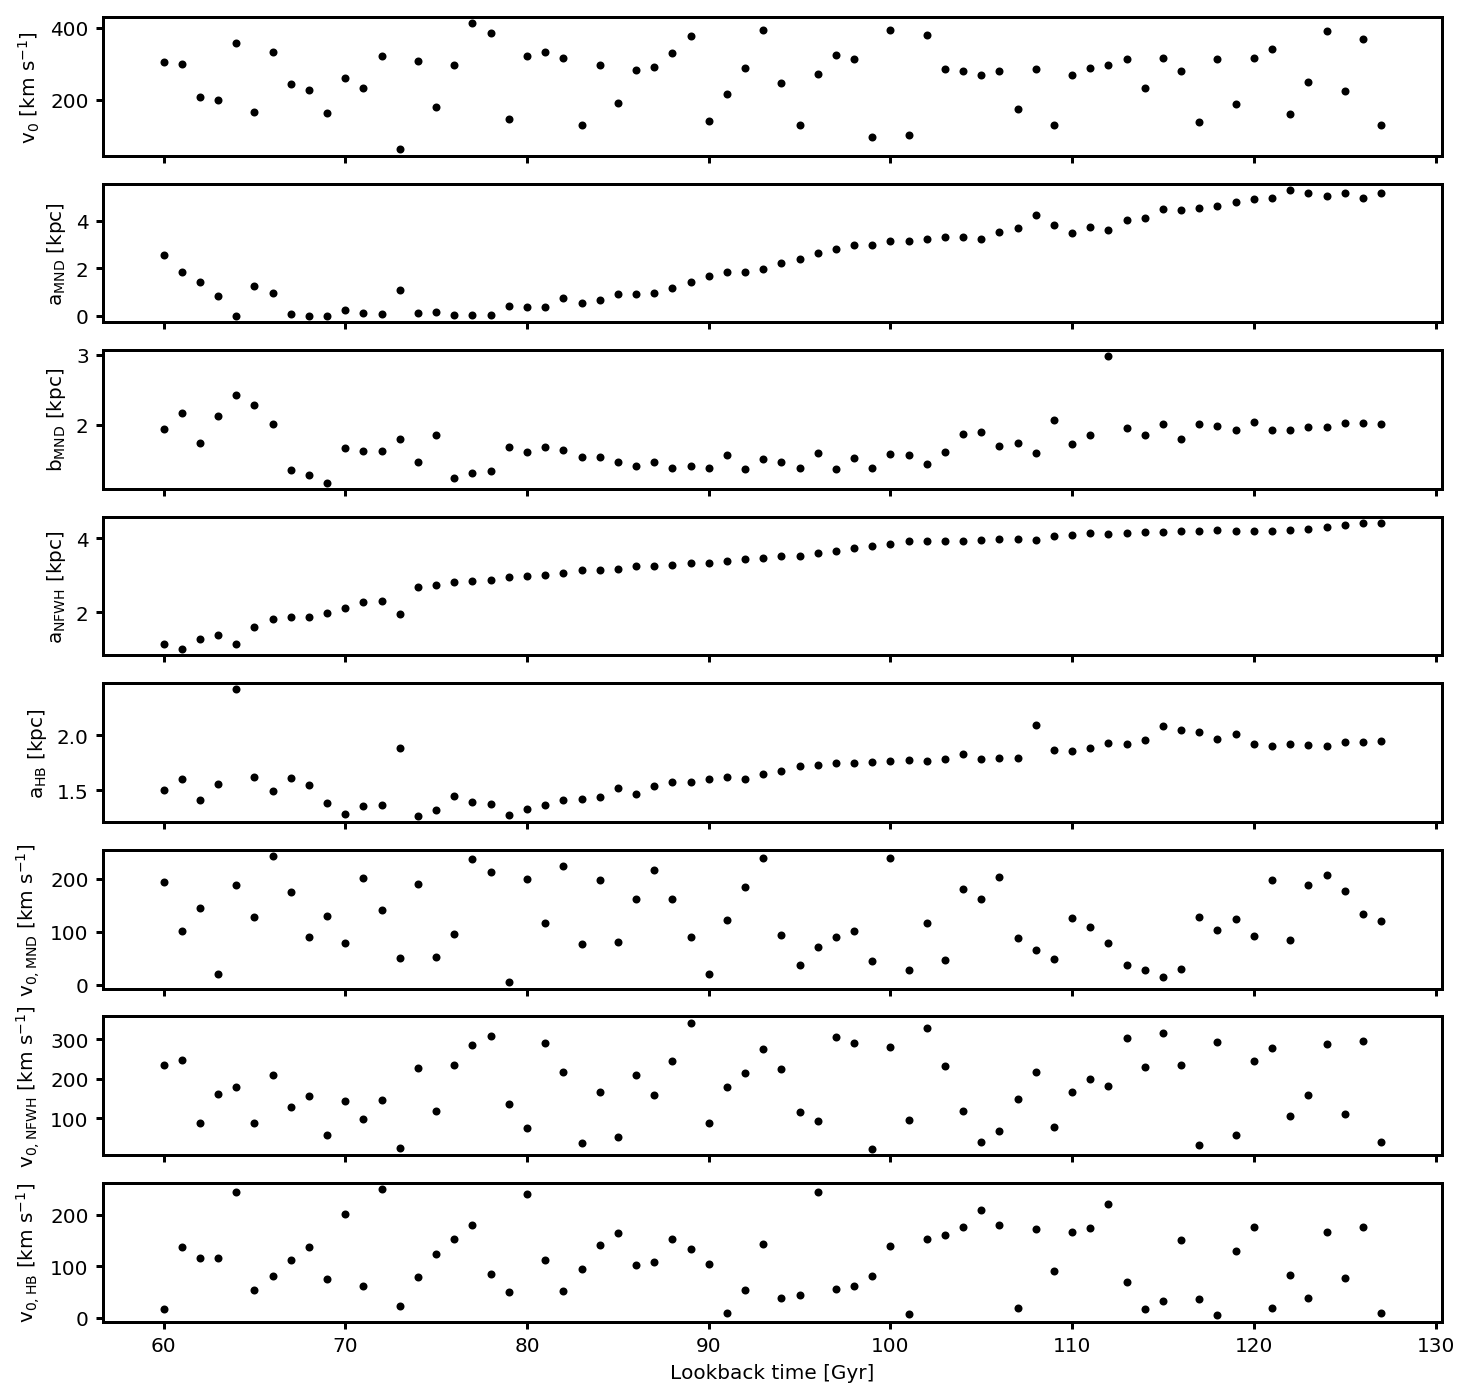

In [10]:
jj = 5
f, axes = plt.subplots(ndim, 1, figsize=(12,12), sharex=True)
for ii in range(ndim):
    axes[ii].set_ylabel(labels[ii])
    if ii == (ndim - 1):
        axes[ii].set_xlabel('Lookback time [Gyr]')
    #axes[ii,1].set_yscale('log', nonposy="clip")
    #zz = np.polyfit(snapnum, params[ii], jj, full = True)
    #p = np.poly1d(zz[0])
    x = np.arange(60,128,1)
    #x = age[-len(x):]
    y = params[ii]
    axes[ii].plot(x,y, 'k.')
    #axes[ii].set_xlim(axes[ii].get_xlim()
    axes[ii].legend()
    #fitted_params.append(p(xp))
    
axes[ii].set_xlim(np.max(age[-len(x):]), np.min(age[-len(x):]))
f.tight_layout()
plt.show()